In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from funcs import banco
from PIL import Image

In [27]:
# Caminhos
path_img = 'banco2/CARACU_1/EGG/imgs_AUGMENTATION'
path_mask = 'banco2/CARACU_1/EGG/label_AUGMENTATION'

# path_img = 'banco2/TreinoGeral/EGG1/imgs_AUGMENTATION'
# path_mask = 'banco2/TreinoGeral/EGG1/label_AUGMENTATION'

list_mask = sorted(os.listdir(path_mask))
list_img = sorted(os.listdir(path_img))
imgs, nomes_img = banco(path_img, resolution=(256,256), grayscale=True, nomes=True)

print(list_img)
print(nomes_img)

['I-2508-251119-154916_dark_15.jpg', 'I-2508-251119-154916_luz_15.jpg', 'I-2508-251119-154916_origi_15.jpg', 'I-2512-251119-161532_dark_11.jpg', 'I-2512-251119-161532_luz_11.jpg', 'I-2512-251119-161532_origi_11.jpg', 'I-2514-251119-155100_dark_24.jpg', 'I-2514-251119-155100_luz_24.jpg', 'I-2514-251119-155100_origi_24.jpg', 'I-2516-251119-154029_dark_6.jpg', 'I-2516-251119-154029_luz_6.jpg', 'I-2516-251119-154029_origi_6.jpg', 'I-2519-251119-162630_dark_0.jpg', 'I-2519-251119-162630_luz_0.jpg', 'I-2519-251119-162630_origi_0.jpg', 'I-2521-251119-154513_dark_5.jpg', 'I-2521-251119-154513_luz_5.jpg', 'I-2521-251119-154513_origi_5.jpg', 'I-2523-251119-155301_dark_2.jpg', 'I-2523-251119-155301_luz_2.jpg', 'I-2523-251119-155301_origi_2.jpg', 'I-2525-251119-153552_dark_9.jpg', 'I-2525-251119-153552_luz_9.jpg', 'I-2525-251119-153552_origi_9.jpg', 'I-2526-251119-160821_dark_22.jpg', 'I-2526-251119-160821_luz_22.jpg', 'I-2526-251119-160821_origi_22.jpg', 'I-2529-251119-161310_dark_3.jpg', 'I-2529

In [28]:
""" Escolha de imagem """
idx = 3
nome = nomes_img[idx]
print(f'Imagem escolhida: {nome}')

Imagem escolhida: I-2512-251119-161532_dark_11.jpg


In [33]:
def _diametro_vertical(mask: np.ndarray) -> int:
    ys = np.where(mask > 0)[0]
    if ys.size == 0:
        return 0
    return int(ys.max() - ys.min() + 1)

px_per_cm=24.05
cm_per_px = 1.0 / px_per_cm 


for i, nome in enumerate(nomes_img[0:10]):
    idx = nomes_img.index(nome)
    # print(nome)
    img_mask = Image.open(os.path.join(path_mask, list_mask[idx]))

    # img_mask = img_mask.convert('L')
    mask_array = np.array(img_mask)/255

    threshold = 0.5
    mask_array = (mask_array > threshold).astype(np.uint8)
    diam_px = _diametro_vertical(mask_array)
    diam_pred_cm = diam_px * cm_per_px
    print(f'Imagem: {nome} - Diâmetro (cm): {diam_pred_cm:.3f}')

    # plt.figure(figsize=(4, 4))
    # plt.imshow(img_mask, cmap='gray')
    # plt.title(f'Máscara - {nome}')
    # plt.axis('off')
    # plt.show()


Imagem: I-2508-251119-154916_dark_15.jpg - Diâmetro (cm): 0.374
Imagem: I-2508-251119-154916_luz_15.jpg - Diâmetro (cm): 0.374
Imagem: I-2508-251119-154916_origi_15.jpg - Diâmetro (cm): 0.374
Imagem: I-2512-251119-161532_dark_11.jpg - Diâmetro (cm): 0.665
Imagem: I-2512-251119-161532_luz_11.jpg - Diâmetro (cm): 0.665
Imagem: I-2512-251119-161532_origi_11.jpg - Diâmetro (cm): 0.665
Imagem: I-2514-251119-155100_dark_24.jpg - Diâmetro (cm): 0.416
Imagem: I-2514-251119-155100_luz_24.jpg - Diâmetro (cm): 0.416
Imagem: I-2514-251119-155100_origi_24.jpg - Diâmetro (cm): 0.416
Imagem: I-2516-251119-154029_dark_6.jpg - Diâmetro (cm): 0.624


Dimensões da máscara: (333, 403)


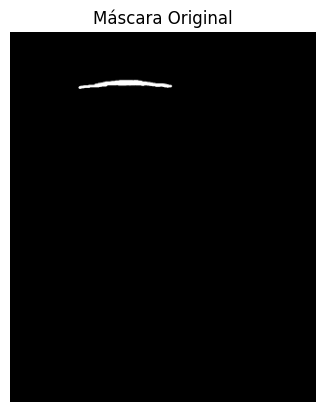

In [42]:
# Exibir algumas imagens e suas máscaras
idx = nomes_img.index(nome)  # Exemplo: imagem específica
img_mask = Image.open(os.path.join(path_mask, list_mask[idx]))
img_mask = img_mask.convert('L') 
print(f'Dimensões da máscara: {img_mask.size}')
plt.imshow(img_mask, cmap='gray')
plt.title('Máscara Original')
plt.axis('off')
plt.show()

In [43]:
""" Calcula o diâmetro da máscara """
px_per_cm=24.05
cm_per_px = 1.0 / px_per_cm 
mask_array = np.array(img_mask)/255
print(f'Dimensões do array da máscara: {mask_array.shape}')

threshold = 0.5
mask_array = (mask_array > threshold).astype(np.uint8)

def _diametro_vertical(mask: np.ndarray) -> int:
    ys = np.where(mask > 0)[0]
    if ys.size == 0:
        return 0
    return int(ys.max() - ys.min() + 1)

diam_px = _diametro_vertical(mask_array)
diam_pred_cm = diam_px * cm_per_px
print(f'Diâmetro vertical da máscara: {diam_px} pixels  equivalem a ({diam_pred_cm:.2f} cm)')

Dimensões do array da máscara: (403, 333)
Diâmetro vertical da máscara: 10 pixels  equivalem a (0.42 cm)


In [6]:
# Calcula a área da máscara onde 1 cm = 24.05 px
mask_array = np.array(img_mask)/255
print(f'Dimensões do array da máscara: {mask_array.shape}')

threshold = 0.5
mask_array = (mask_array > threshold).astype(np.uint8)
area_pixels = int(mask_array.sum())  # Conta os pixels não nulos
pixel_to_cm = 24.05
cm2_per_px2 = 1.0 / (pixel_to_cm ** 2)
area_cm2 = area_pixels * cm2_per_px2
print(f'Área da máscara: {area_cm2:.2f} cm²')

Dimensões do array da máscara: (403, 333)
Área da máscara: 32.85 cm²
